<a href="https://colab.research.google.com/github/EmiRoberti77/collab_pytorch_/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with PyTorch

Classification is a problem of predicting something is one thing or an other. ( there can be multiple things as the options )

In [255]:
## 1. Make classification data
import sklearn

In [256]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000
# create circles
X,y = make_circles(n_samples, noise=0.03, random_state=42)
len(X), len(y)

(1000, 1000)

In [257]:
#look at the first 5 of C
print(f"first 5 of X\n{X[:5]}")
print(f"first 5 of y\n:{y[:5]}")

first 5 of X
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 of y
:[1 1 1 1 0]


In [258]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [259]:
# Make dataframe with Pandas
import pandas as pd
circles = pd.DataFrame({
                        "X1":X[:,0],
                        "X2":X[:,1],
                        "label": y
                      })


In [260]:
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


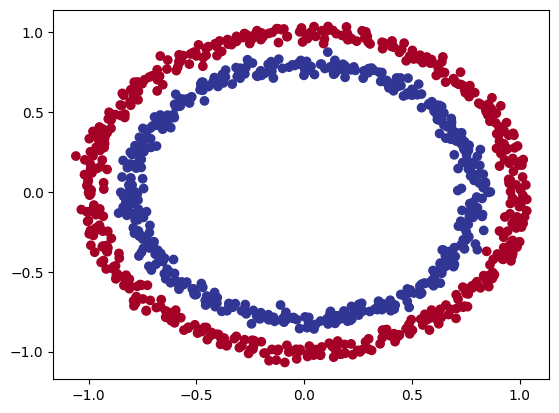

In [261]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [262]:
X.shape, y.shape

((1000, 2), (1000,))

In [263]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Sample features: {X_sample}\nSample label: {y_sample}")
print(f"Shapes for one sample of X {X_sample.shape} and same for y {y_sample.shape}")

Sample features: [0.75424625 0.23148074]
Sample label: 1
Shapes for one sample of X (2,) and same for y ()


In [264]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [265]:
## get the data into tensor
import torch
print(torch.__version__)
type(X)

2.6.0+cu124


numpy.ndarray

In [266]:
#check the type of X
print(type(X))
# convert into a tensor
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X.to(device)
y.to(device)
print(f"X is now:{type(X)}, y is now:{type(y)}")

<class 'numpy.ndarray'>
cpu
X is now:<class 'torch.Tensor'>, y is now:<class 'torch.Tensor'>


In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_labels = train_test_split(X,y,test_size=0.2, random_state=42) # 20% of data is test and 80% is training data
len(X_train), len(X_test), len(y_train), len(y_labels)

(800, 200, 800, 200)

# Building a Model

we will classify the red or blue dots.

to do.
1. Set device agnostic code
2. construct a model ( by subclassing `nn.Module` )
3. define a loss and optimizer
4. build a training loop

In [268]:
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Once we have set device agnostic code we can craete a model

to do
1. Subclass `nn.Module`
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define `forward()` this outlines the forward pass ( forward computation ) of the model
4. Instantiate and instance of our model and send it to a target device

In [269]:
# Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # define two layers that can handle our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x:torch.Tensor)-> torch.Tensor:
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# Instantiate an instance of the class
model_0 = CircleModelV0().to(device=device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [270]:
next(model_0.parameters()).device

device(type='cpu')

Lets replicate the model above using nn.Sequential

In [271]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1),
).to(device=device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [272]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [273]:
device

'cpu'

In [274]:
# make some predictions (model is untrained at the moment)
print(device)
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictons {len(untrained_preds)} shape of predictions {untrained_preds.shape}")
print(f"Length test samples {len(X_test)} shape of predictions {X_test.shape}")
print(f"\nFirst 10 predictions {torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels {y[:10]}")

cpu
Length of predictons 200 shape of predictions torch.Size([200, 1])
Length test samples 200 shape of predictions torch.Size([200, 2])

First 10 predictions tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]])

First 10 labels tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.])


In [275]:
# set up loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [276]:
# Calculate accuracy out of 100 examples what percentage does the model get right
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

## Train the model

to train the model these are the following steps

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss Backwards
5. Optimizer step

### Going from raw logits -> prediction probabilities -> prediction labels

the model outputs are going to be raw **logits**.

we can convert the these **logits** into **predictions probabilities** by passing them into some kind of activation function (e.g sigmoid for binary crossentropy and softmax for multiclass classification )

then we can comvert our model prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [277]:
# make a prediction
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))

# print first 5 predictions
y_logits[:5]

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [278]:
# Use the sigmoid activation function on the model logits to turn them into predictions probabilities
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs[:5]

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

In [279]:
torch.round(y_preds_probs)[:5]

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [280]:
# Find the predicted labels
y_preds = torch.round(y_preds_probs)
# In full (logts->pred probs->pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))
# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
# Get rid of extra dimention
y_preds.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        0., 1.])

## Build the trainig loop

In [281]:
# create seeds for reproduceability
MANUAL_SEED = 42
torch.manual_seed(MANUAL_SEED)
torch.cuda.manual_seed(MANUAL_SEED)
epoch = 1000
# put the data on the gpu
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_labels.to(device)

for epoch in range(epoch):
  #training
  model_0.train()
  #forward pass
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits)) #turn logits -> pred probs -> pred labels
  # Calculate loss/accuracy
  loss = loss_fn(y_logits, y_train) # nn.
  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)
  # optimizer zero grad
  optimizer.zero_grad()
  # loss backwards
  loss.backward()
  #optimizer step

  ## Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # Calculate test loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Print out
  if epoch % 10 == 0:
    print(f"Epoch:{epoch} | Loss:{loss:.5f} | Acc:{acc:.2f}% | Test loss:{test_loss:.5f}, Test acc:{test_acc:2f}%")


Epoch:0 | Loss:0.69796 | Acc:51.88% | Test loss:0.69462, Test acc:57.500000%
Epoch:10 | Loss:0.69796 | Acc:51.88% | Test loss:0.69462, Test acc:57.500000%
Epoch:20 | Loss:0.69796 | Acc:51.88% | Test loss:0.69462, Test acc:57.500000%
Epoch:30 | Loss:0.69796 | Acc:51.88% | Test loss:0.69462, Test acc:57.500000%
Epoch:40 | Loss:0.69796 | Acc:51.88% | Test loss:0.69462, Test acc:57.500000%
Epoch:50 | Loss:0.69796 | Acc:51.88% | Test loss:0.69462, Test acc:57.500000%
Epoch:60 | Loss:0.69796 | Acc:51.88% | Test loss:0.69462, Test acc:57.500000%
Epoch:70 | Loss:0.69796 | Acc:51.88% | Test loss:0.69462, Test acc:57.500000%
Epoch:80 | Loss:0.69796 | Acc:51.88% | Test loss:0.69462, Test acc:57.500000%
Epoch:90 | Loss:0.69796 | Acc:51.88% | Test loss:0.69462, Test acc:57.500000%
Epoch:100 | Loss:0.69796 | Acc:51.88% | Test loss:0.69462, Test acc:57.500000%
Epoch:110 | Loss:0.69796 | Acc:51.88% | Test loss:0.69462, Test acc:57.500000%
Epoch:120 | Loss:0.69796 | Acc:51.88% | Test loss:0.69462, Test

In [282]:
device

'cpu'

##  Make predictions and evaluate the model

From the matrix above it looks like the model is not learning anything

to inspect visualise the data

helper function -- https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [283]:
import requests
from pathlib import Path

FUNCTION_URL = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py"

# Download helper function from repo
if Path("helper_function.py").is_file():
  print("helper function already exists - skipped download")
else:
  request = requests.get(FUNCTION_URL)
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

from helper_function import plot_predictions, plot_decision_boundary

helper function already exists - skipped download


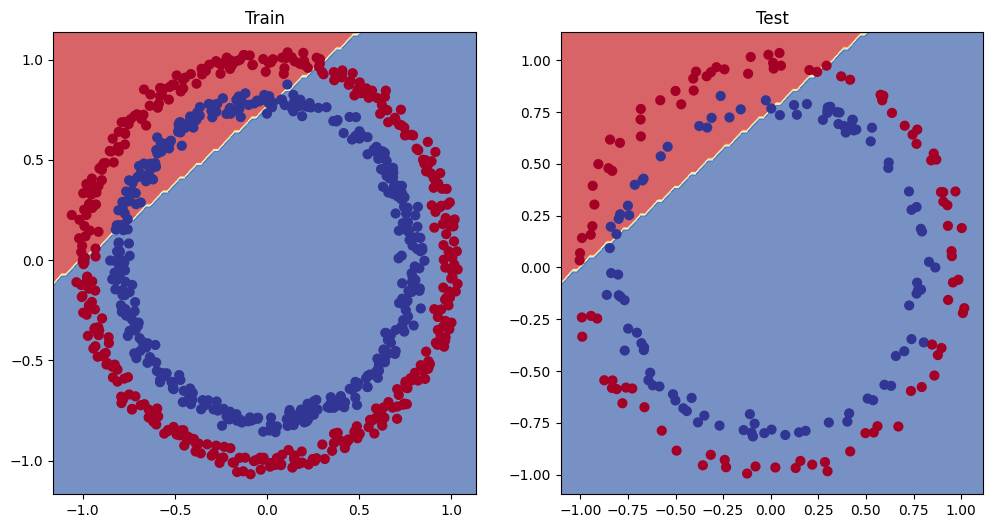

In [284]:
# Plot decision boundary the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_labels)

## Improving the model

- Add more layers
- Add more hidden units
- Fit for longer
- Changing activation functions
- Change the learning rate
- Change the loss function

In [285]:
import torch.nn.functional as F
# Create new model with improvements
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # create the model layers
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x:torch.Tensor)->torch.Tensor:
    return F.relu(self.layer_3(F.relu(self.layer_2(self.layer_1(x)))))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [286]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

target device cpu
Epoch:0 | Loss:0.69315 | Acc:50.00% | Test loss:0.69315, Test acc:50.000000%
Epoch:10 | Loss:0.69315 | Acc:50.00% | Test loss:0.69315, Test acc:50.000000%
Epoch:20 | Loss:0.69315 | Acc:50.00% | Test loss:0.69315, Test acc:50.000000%
Epoch:30 | Loss:0.69315 | Acc:50.00% | Test loss:0.69315, Test acc:50.000000%
Epoch:40 | Loss:0.69315 | Acc:50.00% | Test loss:0.69315, Test acc:50.000000%
Epoch:50 | Loss:0.69315 | Acc:50.00% | Test loss:0.69315, Test acc:50.000000%
Epoch:60 | Loss:0.69315 | Acc:50.00% | Test loss:0.69315, Test acc:50.000000%
Epoch:70 | Loss:0.69315 | Acc:50.00% | Test loss:0.69315, Test acc:50.000000%
Epoch:80 | Loss:0.69315 | Acc:50.00% | Test loss:0.69315, Test acc:50.000000%
Epoch:90 | Loss:0.69315 | Acc:50.00% | Test loss:0.69315, Test acc:50.000000%


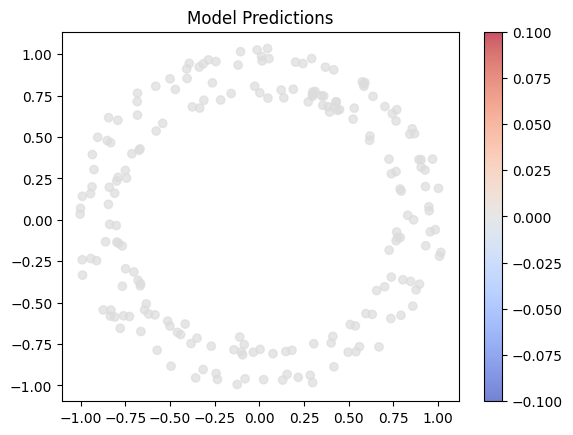

In [291]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
# Create a optimizer
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.1)

# Create a training and evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
print(f"target device {device}")

epoch = 100
for epoch in range(epoch):
  # train
  model_1.train()
  # forward pass
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  # calculate loss / acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)
  # optimizer zero grad
  optimizer.zero_grad()
  # loss backwards
  loss.backward()
  # optimizer step
  optimizer.step()

  ## testing
  # eval model mode
  model_1.eval()
  # inference
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    # calculare the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

# print output
  if epoch % 10 == 0:
    print(f"Epoch:{epoch} | Loss:{loss:.5f} | Acc:{acc:.2f}% | Test loss:{test_loss:.5f}, Test acc:{test_acc:2f}%")


plt.scatter(X_test[:, 0].cpu(), X_test[:, 1].cpu(), c=test_preds, cmap="coolwarm", alpha=0.7)
plt.title("Model Predictions")
plt.colorbar()
plt.show()
